In [8]:
import os
import pandas as pd

# Path to the data folder
data_folder = "data"

# Initialize a summary dictionary to store file details
file_summaries = []

# Iterate over CSV files in the folder
for file_name in [f for f in os.listdir(data_folder) if f.endswith(".csv")]:
    file_path = os.path.join(data_folder, file_name)
    
    # Load each CSV file
    try:
        df = pd.read_csv(file_path)
        
        # Summarize the structure of the DataFrame
        summary = {
            "File Name": file_name,
            "Rows": df.shape[0],
            "Columns": df.shape[1],
            "Column Names": list(df.columns),
            "Non-Null Counts": df.notnull().sum().to_dict(),
            "Dtypes": df.dtypes.to_dict()
        }
        file_summaries.append(summary)
        
        # Print a brief summary
        print(f"\nFile: {file_name}")
        print("=" * 50)
        print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
        print(f"Columns: {list(df.columns)}")
        print(f"Data Types:\n{df.dtypes}")
        print(f"Missing Values:\n{df.isnull().sum()}")

    except Exception as e:
        print(f"Error loading file {file_name}: {e}")

# Save a summary report as a CSV for reference
summary_df = pd.DataFrame(file_summaries)
summary_df.to_csv("data_summary.csv", index=False)



File: advanced.csv
Rows: 34024, Columns: 28
Columns: ['gameid', 'home', 'team', 'playerid', 'name', 'SEC', 'estOFFRTG', 'OFFRTG', 'estDEFRTG', 'DEFRTG', 'estNETRTG', 'NETRTG', 'ASTpct', 'ASTtoTOV', 'ASTratio', 'ORBpct', 'DRBpct', 'REBpct', 'TOVratio', 'effFGpct', 'TSpct', 'USGpct', 'estUSGpct', 'estpace', 'pace', 'paceper40', 'POS', 'pie']
Data Types:
gameid         int64
home            bool
team          object
playerid       int64
name          object
SEC          float64
estOFFRTG    float64
OFFRTG       float64
estDEFRTG    float64
DEFRTG       float64
estNETRTG    float64
NETRTG       float64
ASTpct       float64
ASTtoTOV     float64
ASTratio     float64
ORBpct       float64
DRBpct       float64
REBpct       float64
TOVratio     float64
effFGpct     float64
TSpct        float64
USGpct       float64
estUSGpct    float64
estpace      float64
pace         float64
paceper40    float64
POS            int64
pie          float64
dtype: object
Missing Values:
gameid          0
home     

In [9]:

# Load game-level and team-level data
games = pd.read_csv("data/games.csv")
team_basic = pd.read_csv("data/team_basic.csv")
team_advanced = pd.read_csv("data/team_advanced.csv")

# Merge game-level data with home and away team stats
# Home team stats
home_stats = team_basic.merge(team_advanced, on=['gameid', 'team'], suffixes=('_basic', '_advanced'))
home_stats = home_stats.rename(columns={col: f"home_{col}" for col in home_stats.columns if col not in ['gameid', 'team']})

# Away team stats
away_stats = team_basic.merge(team_advanced, on=['gameid', 'team'], suffixes=('_basic', '_advanced'))
away_stats = away_stats.rename(columns={col: f"away_{col}" for col in away_stats.columns if col not in ['gameid', 'team']})

# Merge both home and away stats with the games data
game_data = games.merge(home_stats, left_on=['gameid', 'home'], right_on=['gameid', 'team'], how='left')
game_data = game_data.merge(away_stats, left_on=['gameid', 'away'], right_on=['gameid', 'team'], how='left')

# Drop redundant columns
game_data = game_data.drop(columns=['team_x', 'team_y'])

# Compute the target variable: Spread (home_points - away_points)
game_data['spread'] = game_data['h_pts'] - game_data['a_pts']

# Save the consolidated game-level dataset
game_data.to_csv("data/consolidated_game_data.csv", index=False)

# Display the first few rows of the dataset
print(game_data.head())


     gameid                  date home  h_pts away  a_pts  ot     type  \
0  22200001  2022-10-18T19:30:00Z  BOS    126  PHI    117   0  regular   
1  22200002  2022-10-18T22:00:00Z  GSW    123  LAL    109   0  regular   
2  22200003  2022-10-19T19:00:00Z  DET    113  ORL    109   0  regular   
3  22200004  2022-10-19T19:00:00Z  IND    107  WAS    114   0  regular   
4  22200008  2022-10-19T19:30:00Z  TOR    108  CLE    105   0  regular   

   home_home_basic  home_SEC_basic  ...  away_effFGpct  away_TSpct  \
0             True           14400  ...          0.581       0.634   
1             True           14400  ...          0.479       0.519   
2             True           14400  ...          0.552       0.578   
3             True           14400  ...          0.516       0.556   
4             True           14400  ...          0.558       0.603   

   away_USGpct  away_estUSGpct  away_estpace  away_pace  away_paceper40  \
0            1           0.192        100.82       97.5    

In [10]:
import pandas as pd

# Load the consolidated dataset
df = pd.read_csv("data\consolidated_game_data.csv")

# Descriptive statistics
desc_stats = df.describe()

# Missing values
missing_values = df.isnull().sum()

# Display summary
print("Descriptive Statistics:")
print(desc_stats)

print("\nMissing Values:")
print(missing_values)


Descriptive Statistics:
             gameid        h_pts        a_pts           ot  home_SEC_basic  \
count  1.320000e+03  1320.000000  1320.000000  1320.000000     1320.000000   
mean   2.360968e+07   115.630303   113.030303     0.071212    14506.818182   
std    5.251639e+06    11.991075    12.001920     0.285226      427.839607   
min    2.220000e+07    80.000000    79.000000     0.000000    14400.000000   
25%    2.220033e+07   108.000000   105.000000     0.000000    14400.000000   
50%    2.220066e+07   116.000000   113.000000     0.000000    14400.000000   
75%    2.220099e+07   124.000000   121.000000     0.000000    14400.000000   
max    5.220021e+07   175.000000   176.000000     2.000000    17400.000000   

          home_FGM     home_FGA   home_FGpct     home_3PM     home_3PA  ...  \
count  1320.000000  1320.000000  1320.000000  1320.000000  1320.000000  ...   
mean     42.215152    88.177273     0.480117    12.553788    34.306061  ...   
std       5.037155     7.339515     

In [11]:
# Columns relevant to the modeling
feature_columns = [
     'home_FGA', 'home_FGpct', 'home_3PM', 'home_3PA', 'home_3Ppct',
    'home_FTM', 'home_FTA', 'home_FTpct', 'home_AST', 'home_STL', 'home_BLK',
    'home_TOV', 'home_PF', 'home_effFGpct', 'home_pace',
    'away_FGA', 'away_FGpct', 'away_3PM', 'away_3PA', 'away_3Ppct',
    'away_FTM', 'away_FTA', 'away_FTpct', 'away_AST', 'away_STL', 'away_BLK',
    'away_TOV', 'away_PF', 'away_effFGpct', 'away_pace',
]

# Target variable
target_column = 'spread'

# Filter the data
model_data = df[feature_columns + [target_column]].dropna()

print("Filtered dataset ready for modeling.")


Filtered dataset ready for modeling.


In [22]:
print(df.columns)

Index(['gameid', 'date', 'home', 'h_pts', 'away', 'a_pts', 'ot', 'type',
       'home_home_basic', 'home_SEC_basic',
       ...
       'away_effFGpct', 'away_TSpct', 'away_USGpct', 'away_estUSGpct',
       'away_estpace', 'away_pace', 'away_paceper40', 'away_POS', 'away_pie',
       'spread'],
      dtype='object', length=101)


In [ ]:
date_column = 'date' if 'date' in df.columns else None
team_column = 'home' if 'home' in df.columns else None


if date_column and team_column:
    df = df.sort_values(by=[team_column, date_column])
else:
    raise KeyError("Columns 'team' and 'date' (or their equivalents) are not found in the DataFrame.")

# Define key metrics for rolling averages
rolling_metrics = [
    'h_pts',          # Points scored
    'home_TSpct',        # Field goal percentage
    'home_estpace'
]

# Compute rolling averages for a window of the last 5 games
rolling_window = 5
for metric in rolling_metrics:
    if metric in df.columns:
        df[f'{metric}_rolling_avg'] = (
            df.groupby(team_column)[metric]
            .transform(lambda x: x.rolling(window=rolling_window, min_periods=1).mean())
        )
    else:
        print(f"Warning: Metric '{metric}' not found in DataFrame columns.")


date


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X = model_data[feature_columns]
y = model_data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a baseline linear regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Make predictions
y_pred_train = baseline_model.predict(X_train)
y_pred_test = baseline_model.predict(X_test)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Training Performance:")
print(f"MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, R^2: {r2_train:.2f}")

print("\nTesting Performance:")
print(f"MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, R^2: {r2_test:.2f}")


Training Performance:
MAE: 0.74, MSE: 1.05, R^2: 0.99

Testing Performance:
MAE: 0.74, MSE: 1.20, R^2: 0.99


In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R^2 scores:", scores)
print("Mean R^2:", scores.mean())
corr_matrix = X_train.join(y_train).corr()
print(corr_matrix["spread"].sort_values(ascending=False))


Cross-validated R^2 scores: [0.71866871 0.75568799 0.72845449 0.71556775 0.75561499]
Mean R^2: 0.7347987888552165
spread           1.000000
home_effFGpct    0.537481
home_FGpct       0.501927
home_3Ppct       0.405031
home_AST         0.375179
home_3PM         0.362306
away_TOV         0.202758
home_STL         0.187399
home_BLK         0.154260
home_FTpct       0.117693
home_3PA         0.095942
home_FTM         0.073035
away_pace        0.041033
home_pace        0.041033
home_FTA         0.034075
home_FGA         0.020468
away_PF         -0.000262
home_PF         -0.025384
away_3PA        -0.037627
away_FTA        -0.041481
away_FGA        -0.057546
away_FTM        -0.083846
away_FTpct      -0.127079
home_TOV        -0.131700
away_BLK        -0.154104
away_STL        -0.170914
away_3PM        -0.331256
away_AST        -0.379097
away_3Ppct      -0.412290
away_FGpct      -0.498345
away_effFGpct   -0.523822
Name: spread, dtype: float64


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best MAE (negative):", grid_search.best_score_)

# Use the best estimator to evaluate on the test set
best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test)

# Evaluate the test performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test Performance with Optimized Model:\nMAE: {mae:.2f}, MSE: {mse:.2f}, R^2: {r2:.2f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\ethro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ethro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ethro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best MAE (negative): -5.852651614401973
Test Performance with Optimized Model:
MAE: 5.23, MSE: 45.93, R^2: 0.74


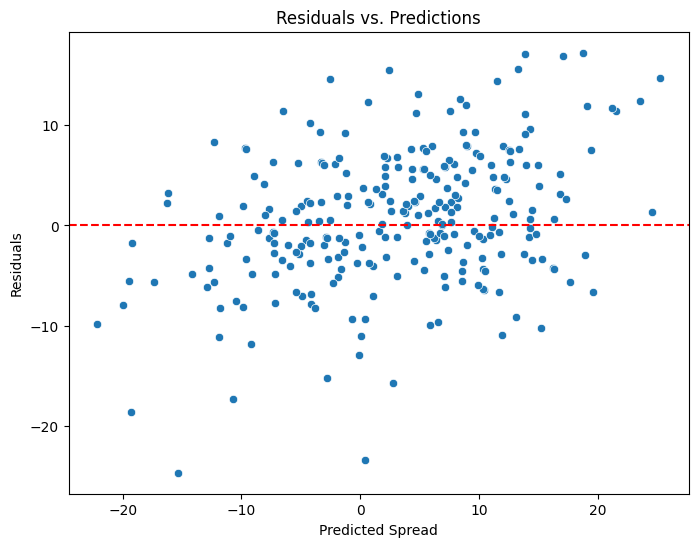

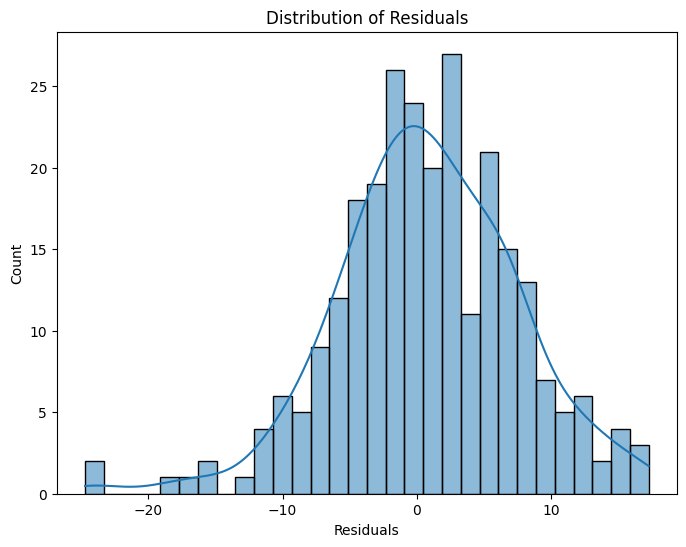

Mean of residuals: 0.7304992634680135
Standard deviation of residuals: 6.737541421860921


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute residuals
residuals = y_test - y_test_pred

# Plot residuals vs. predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Spread')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predictions')
plt.show()

# Plot distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Check for patterns in residuals
print("Mean of residuals:", np.mean(residuals))
print("Standard deviation of residuals:", np.std(residuals))


In [29]:
from sklearn.preprocessing import PolynomialFeatures

# Generate interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a model with interaction terms
rf_with_interactions = RandomForestRegressor(random_state=42)
rf_with_interactions.fit(X_train_poly, y_train)

# Evaluate performance
y_pred_test_poly = rf_with_interactions.predict(X_test_poly)
mae_poly = mean_absolute_error(y_test, y_pred_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_test_poly)
r2_poly = r2_score(y_test, y_pred_test_poly)

print(f"Performance with Interaction Terms:\nMAE: {mae_poly:.2f}, MSE: {mse_poly:.2f}, R^2: {r2_poly:.2f}")


Performance with Interaction Terms:
MAE: 3.82, MSE: 25.40, R^2: 0.86


In [38]:

# Add residuals to the test data for analysis
test_data_with_residuals = X_test.copy()
test_data_with_residuals['Actual'] = y_test
test_data_with_residuals['Predicted'] = y_pred_test
test_data_with_residuals['Residuals'] = residuals

# Sort by absolute residual values to find potential outliers
outliers = test_data_with_residuals.sort_values(by='Residuals', key=abs, ascending=False).head(10)

# Display the outliers
print("Top 10 Outliers in Residuals:")
print(outliers)


Top 10 Outliers in Residuals:
      home_FGA  home_FGpct  home_3PM  home_3PA  home_3Ppct  home_FTM  \
1144        93       0.323         9        39       0.231        11   
433         77       0.468        12        30       0.400         7   
344         87       0.437         6        31       0.194        13   
1197        76       0.513        10        36       0.278        13   
1088        98       0.520        15        43       0.349        13   
610         89       0.607        11        31       0.355        28   
1285        92       0.467        20        51       0.392        15   
1135       101       0.525        14        30       0.467        16   
54          92       0.511        12        29       0.414        28   
1278       101       0.475        16        37       0.432        13   

      home_FTA  home_FTpct  home_AST  home_STL  ...  away_AST  away_STL  \
1144        12       0.917        18         5  ...        30         9   
433          8       0.875 

In [30]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the XGBoost regressor
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test_xgb = xgb_model.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_test_xgb)
r2_xgb = r2_score(y_test, y_pred_test_xgb)

print(f"XGBoost Performance:\nMAE: {mae_xgb:.2f}, MSE: {mse_xgb:.2f}, R^2: {r2_xgb:.2f}")


XGBoost Performance:
MAE: 3.62, MSE: 21.96, R^2: 0.88


In [33]:
from sklearn.linear_model import LassoCV

# Define independent and dependent variables
# Convert non-numeric columns to numeric or drop them
X = df.select_dtypes(include=['number']).drop(columns=['spread'], errors='ignore')  # Replace 'spread' with the target variable
y = df['spread'] if 'spread' in df.columns else None

if y is not None and not y.isnull().any():
    lasso = LassoCV(cv=5, random_state=42)
    lasso.fit(X, y)

    # Identify important features
    important_features = pd.Series(lasso.coef_, index=X.columns)
    important_features = important_features[important_features != 0].sort_values(ascending=False)

    print("Important features identified by LASSO:")
    print(important_features)
else:
    print("Warning: Target variable 'spread' is missing or contains null values. Skipping LASSO feature selection.")


Important features identified by LASSO:
gameid    6.930223e-08
dtype: float64
